## Procesamiento y analisis estadistico

In [75]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [76]:
# URL de la API
url = "https://sig.simur.gov.co/arcgis/rest/services/Accidentalidad/AccidentalidadAnalisis/FeatureServer/2/query?where=1%3D1&outFields=*&outSR=4326&f=json"

# Hacer la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta a JSON
    data = response.json()
    print("Datos obtenidos exitosamente")

Datos obtenidos exitosamente


In [77]:
features = data.get('features', [])  # Obtener la lista de features
rows = []  # Lista para almacenar los datos

# Recorrer cada feature y extraer los atributos
for feature in features:
    attributes = feature.get('attributes', {})  # Obtener el diccionario de atributos
    rows.append(attributes)  # Agregar los atributos a la lista

In [78]:
accidentes_data = pd.DataFrame(rows)
accidentes_data.head(5)

,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,MUNICIPIO,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA
0,1115,A001390689,10563353.0,1644814800000,19:30:00,2022.0,FEBRERO,LUNES,DG 73 G - KR 79 A S 02,CON HERIDOS,ATROPELLO,BOSA,BOGOTA DC,1644885000000,4.607566,-74.201473,7005634.0,NaN
1,1116,A00410350,305198.0,1220850000000,08:20:00,2008.0,SEPTIEMBRE,LUNES,TR 52-1B 02,CON MUERTOS,CHOQUE,PUENTE ARANDA,BOGOTA DC,1220880000000,4.610252,-74.118635,16002240.0,236515.0
2,1117,A000757293,4506419.0,1516856400000,21:20:00,2018.0,ENERO,JUEVES,CL 52-KR 13A S 2,CON HERIDOS,CHOQUE,TUNJUELITO,BOGOTA DC,1516933200000,4.563616,-74.126296,6001458.0,132217.0
3,1118,727366900,36373.0,1188277200000,07:30:00,2007.0,AGOSTO,MARTES,AC 116-70H 0,SOLO DANOS,CHOQUE,SUBA,BOGOTA DC,1188304200000,4.699019,-74.076723,11010946.0,50015042.0
4,1119,A1061345,428805.0,1337058000000,05:50:00,2012.0,MAYO,MARTES,CL 26-KR 79A S 02,SOLO DANOS,CHOQUE,KENNEDY,BOGOTA DC,1337079000000,4.629726,-74.152551,8004631.0,231633.0


In [79]:
accidentes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              2000 non-null   int64  
 1   FORMULARIO            2000 non-null   object 
 2   CODIGO_ACCIDENTE      2000 non-null   float64
 3   FECHA_OCURRENCIA_ACC  2000 non-null   int64  
 4   HORA_OCURRENCIA_ACC   2000 non-null   object 
 5   ANO_OCURRENCIA_ACC    2000 non-null   float64
 6   MES_OCURRENCIA_ACC    2000 non-null   object 
 7   DIA_OCURRENCIA_ACC    2000 non-null   object 
 8   DIRECCION             2000 non-null   object 
 9   GRAVEDAD              2000 non-null   object 
 10  CLASE_ACC             2000 non-null   object 
 11  LOCALIDAD             2000 non-null   object 
 12  MUNICIPIO             2000 non-null   object 
 13  FECHA_HORA_ACC        2000 non-null   int64  
 14  LATITUD               2000 non-null   float64
 15  LONGITUD             

In [80]:
accidentes_data.isna().sum()

,0
OBJECTID,0
FORMULARIO,0
CODIGO_ACCIDENTE,0
FECHA_OCURRENCIA_ACC,0
HORA_OCURRENCIA_ACC,0
ANO_OCURRENCIA_ACC,0
MES_OCURRENCIA_ACC,0
DIA_OCURRENCIA_ACC,0
DIRECCION,0
GRAVEDAD,0


In [81]:
accidentes_data.drop(columns=['PK_CALZADA'],inplace=True) # Información que cuenta con demasiados valores nulos

In [82]:
accidentes_data.drop(columns=['CIV'],inplace=True) # Información que no es relevante para el análisis

In [83]:
accidentes_data.isna().sum()

,0
OBJECTID,0
FORMULARIO,0
CODIGO_ACCIDENTE,0
FECHA_OCURRENCIA_ACC,0
HORA_OCURRENCIA_ACC,0
ANO_OCURRENCIA_ACC,0
MES_OCURRENCIA_ACC,0
DIA_OCURRENCIA_ACC,0
DIRECCION,0
GRAVEDAD,0


In [84]:
# Reemplazar cadenas vacías o espacios con NaN
accidentes_data.replace(["", " ", "NaN", "null"], np.nan, inplace=True)

# Ahora aplicar dropna()
accidentes_data.dropna(inplace=True)

In [41]:
accidentes_data.dropna()
accidentes_data.info()
# Obtenemos finalmente una tabla sin valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              2000 non-null   int64  
 1   FORMULARIO            2000 non-null   object 
 2   CODIGO_ACCIDENTE      2000 non-null   float64
 3   FECHA_OCURRENCIA_ACC  2000 non-null   int64  
 4   HORA_OCURRENCIA_ACC   2000 non-null   object 
 5   ANO_OCURRENCIA_ACC    2000 non-null   float64
 6   MES_OCURRENCIA_ACC    2000 non-null   object 
 7   DIA_OCURRENCIA_ACC    2000 non-null   object 
 8   DIRECCION             2000 non-null   object 
 9   GRAVEDAD              2000 non-null   object 
 10  CLASE_ACC             2000 non-null   object 
 11  LOCALIDAD             2000 non-null   object 
 12  MUNICIPIO             2000 non-null   object 
 13  FECHA_HORA_ACC        2000 non-null   int64  
 14  LATITUD               2000 non-null   float64
 15  LONGITUD             

In [85]:
accidentes_data['MUNICIPIO'].value_counts()
accidentes_data.drop(columns=['MUNICIPIO'],inplace=True) # Información que no es relevante para el análisis, todos los registros son en bogotá

In [86]:
accidentes_data.drop(columns=['OBJECTID','FECHA_HORA_ACC'],inplace=True) # Información que no es relevante para el análisis, todos los registros son en bogotá
accidentes_data.head(5)

,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,LATITUD,LONGITUD
0,A001390689,10563353.0,1644814800000,19:30:00,2022.0,FEBRERO,LUNES,DG 73 G - KR 79 A S 02,CON HERIDOS,ATROPELLO,BOSA,4.607566,-74.201473
1,A00410350,305198.0,1220850000000,08:20:00,2008.0,SEPTIEMBRE,LUNES,TR 52-1B 02,CON MUERTOS,CHOQUE,PUENTE ARANDA,4.610252,-74.118635
2,A000757293,4506419.0,1516856400000,21:20:00,2018.0,ENERO,JUEVES,CL 52-KR 13A S 2,CON HERIDOS,CHOQUE,TUNJUELITO,4.563616,-74.126296
3,727366900,36373.0,1188277200000,07:30:00,2007.0,AGOSTO,MARTES,AC 116-70H 0,SOLO DANOS,CHOQUE,SUBA,4.699019,-74.076723
4,A1061345,428805.0,1337058000000,05:50:00,2012.0,MAYO,MARTES,CL 26-KR 79A S 02,SOLO DANOS,CHOQUE,KENNEDY,4.629726,-74.152551


In [87]:
accidentes_data['CLASE_ACC'].value_counts()

,count
CLASE_ACC,
CHOQUE,1577
ATROPELLO,300
CAIDA DE OCUPANTE,70
OTRO,27
VOLCAMIENTO,22
AUTOLESION,4


In [88]:
accidentes_data['GRAVEDAD'].value_counts()

,count
GRAVEDAD,
CON HERIDOS,1081
SOLO DANOS,872
CON MUERTOS,47


array([[<Axes: title={'center': 'CODIGO_ACCIDENTE'}>,
        <Axes: title={'center': 'FECHA_OCURRENCIA_ACC'}>],
       [<Axes: title={'center': 'ANO_OCURRENCIA_ACC'}>,
        <Axes: title={'center': 'LATITUD'}>],
       [<Axes: title={'center': 'LONGITUD'}>, <Axes: >]], dtype=object)

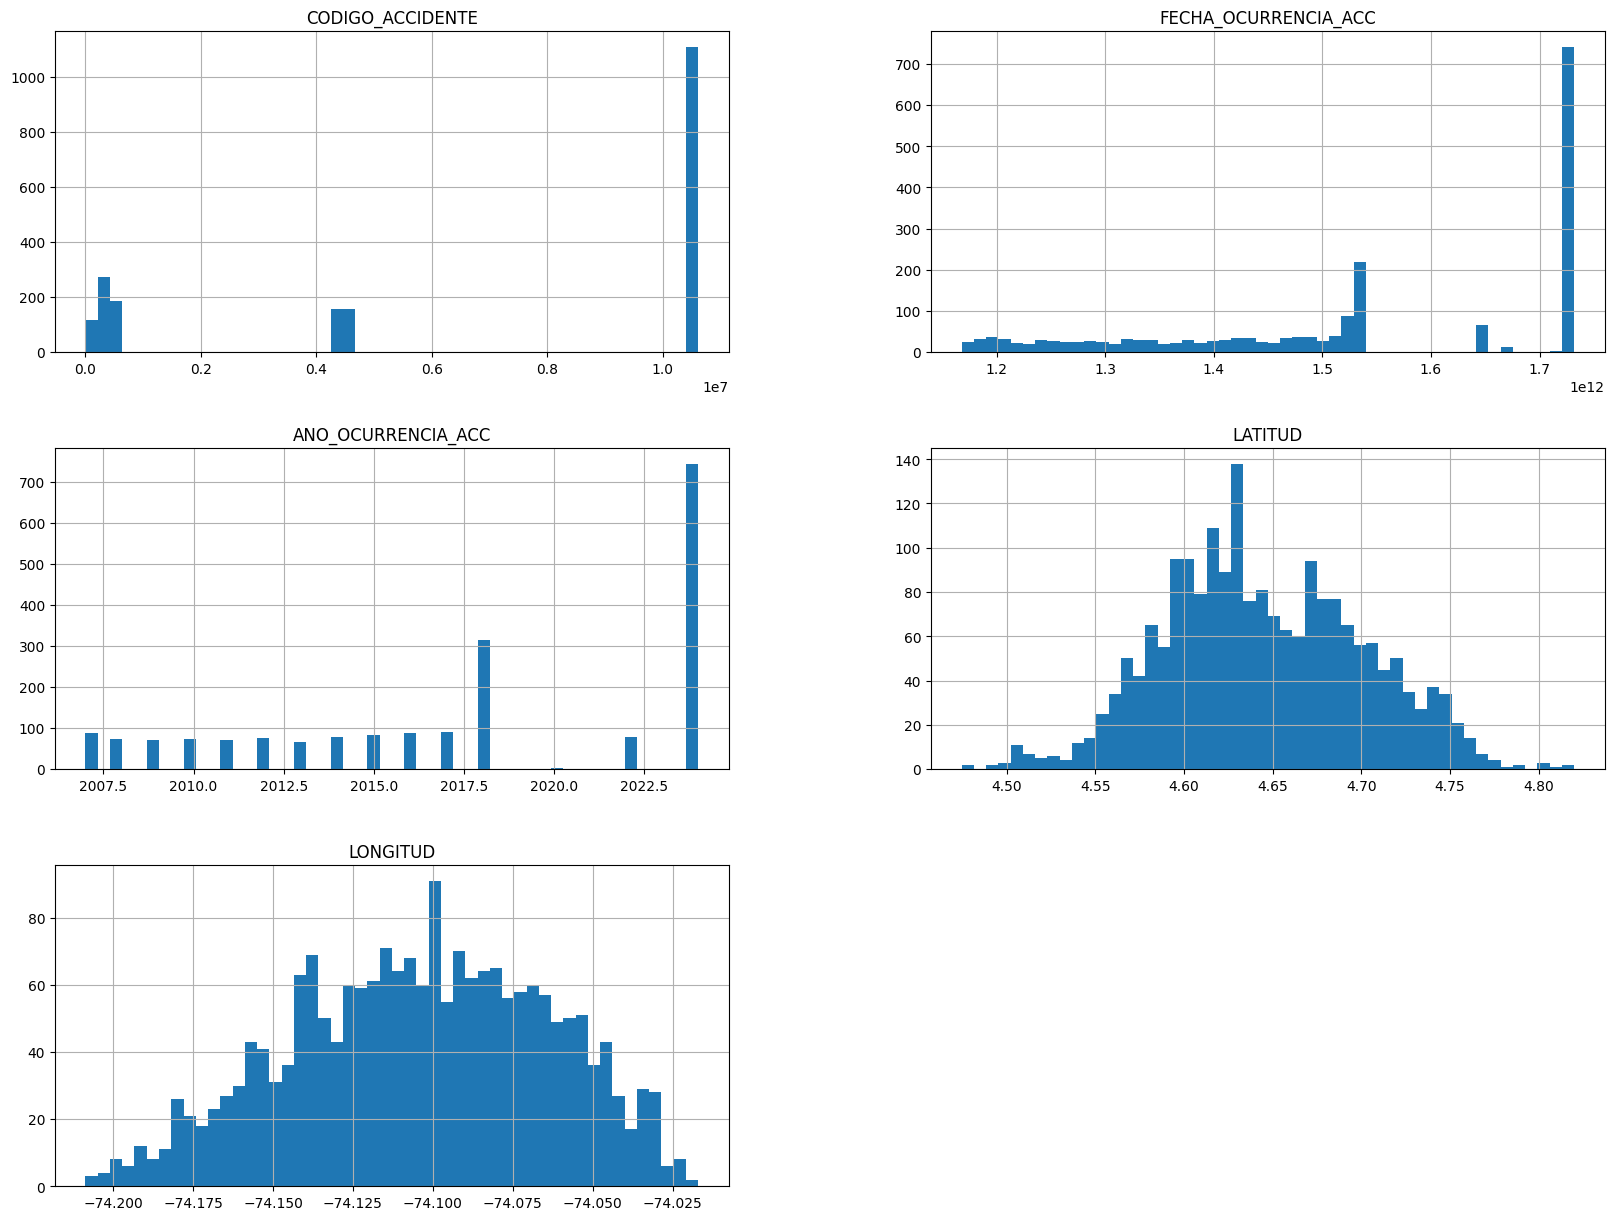

In [89]:
accidentes_data.hist(bins=50, figsize=(20,15)) #Plots a histogram of the numerical attributes
# Importante. Graficar aquellos que tienen sentido análizar en un histograma

array([[<Axes: title={'center': 'ANO_OCURRENCIA_ACC'}>]], dtype=object)

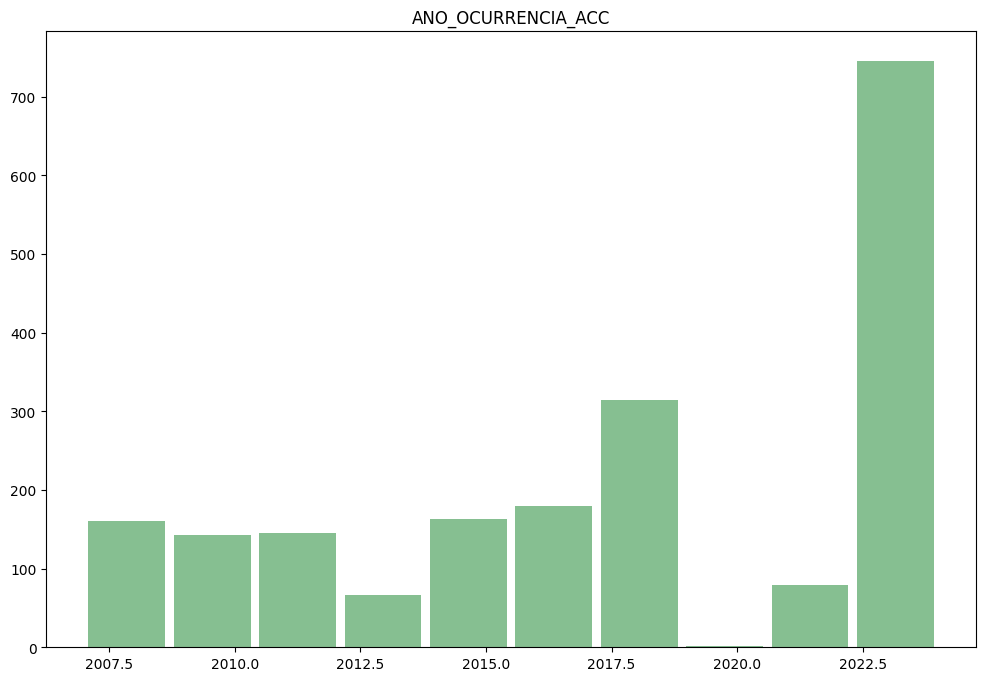

In [90]:
accidentes_data.hist(column='ANO_OCURRENCIA_ACC', bins=10, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

<Axes: xlabel='LATITUD', ylabel='LONGITUD'>

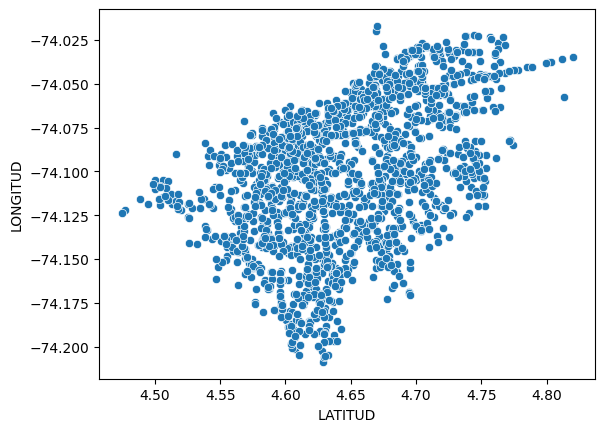

In [91]:
sb.scatterplot(x = "LATITUD", y = "LONGITUD", data = accidentes_data)

<Axes: xlabel='LATITUD', ylabel='LONGITUD'>

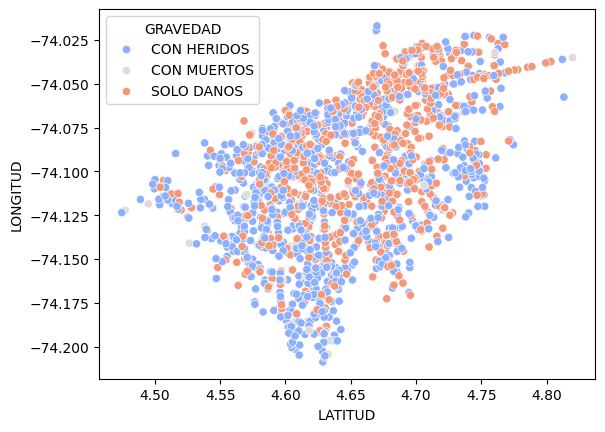

In [92]:
sb.scatterplot(x = "LATITUD", y = "LONGITUD", data = accidentes_data, hue = "GRAVEDAD", palette = "coolwarm")

<Axes: xlabel='LATITUD', ylabel='LONGITUD'>

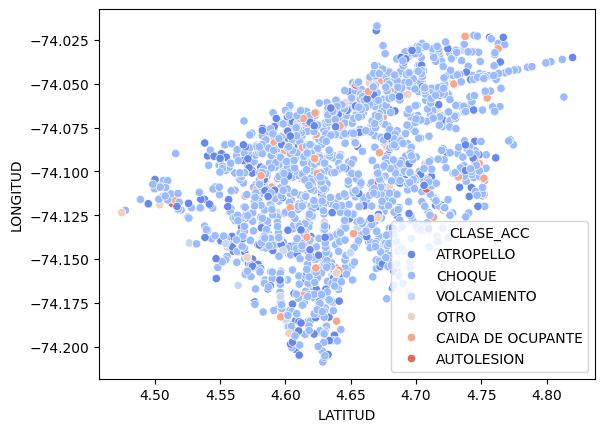

In [93]:
sb.scatterplot(x = "LATITUD", y = "LONGITUD", data = accidentes_data, hue = "CLASE_ACC", palette = "coolwarm")

## Ajuste de datos

In [94]:
accidentes_data.head(5)

,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,LATITUD,LONGITUD
0,A001390689,10563353.0,1644814800000,19:30:00,2022.0,FEBRERO,LUNES,DG 73 G - KR 79 A S 02,CON HERIDOS,ATROPELLO,BOSA,4.607566,-74.201473
1,A00410350,305198.0,1220850000000,08:20:00,2008.0,SEPTIEMBRE,LUNES,TR 52-1B 02,CON MUERTOS,CHOQUE,PUENTE ARANDA,4.610252,-74.118635
2,A000757293,4506419.0,1516856400000,21:20:00,2018.0,ENERO,JUEVES,CL 52-KR 13A S 2,CON HERIDOS,CHOQUE,TUNJUELITO,4.563616,-74.126296
3,727366900,36373.0,1188277200000,07:30:00,2007.0,AGOSTO,MARTES,AC 116-70H 0,SOLO DANOS,CHOQUE,SUBA,4.699019,-74.076723
4,A1061345,428805.0,1337058000000,05:50:00,2012.0,MAYO,MARTES,CL 26-KR 79A S 02,SOLO DANOS,CHOQUE,KENNEDY,4.629726,-74.152551


In [95]:
accidentes_data['FECHA_OCURRENCIA_ACC'] = pd.to_datetime(accidentes_data['FECHA_OCURRENCIA_ACC'], unit='ms')  # Pasamos la fecha a correcto formato datetime

# Obtener el intervalo de tiempo correcto
fecha_min = accidentes_data['FECHA_OCURRENCIA_ACC'].min().replace(day=1) #Ponemos la fecha minima como el primer dia del mes para que el intervalo de meses quede completo
fecha_max = accidentes_data['FECHA_OCURRENCIA_ACC'].max()

print(f"El intervalo de tiempo presente en el dataframe es desde {fecha_min} hasta {fecha_max}")

# Agrupar por mes y contar el número de accidentes
aux_mes = accidentes_data.groupby(accidentes_data['FECHA_OCURRENCIA_ACC'].dt.to_period('M')).size().reset_index(name='cantidad_accidentes')

# Convertir la columna de periodo a datetime (primer día del mes)
aux_mes['FECHA_OCURRENCIA_ACC'] = aux_mes['FECHA_OCURRENCIA_ACC'].dt.to_timestamp()

# Generar un rango de meses completo dentro del intervalo
rango_meses = pd.date_range(start=fecha_min, end=fecha_max, freq='MS').normalize()

# Crear un nuevo DataFrame con el rango de meses
accidentes_por_mes = pd.DataFrame({'FECHA_OCURRENCIA_ACC': rango_meses})

# Hacer un merge con los datos de accidentes y llenar los valores NaN con 0
accidentes_por_mes = accidentes_por_mes.merge(aux_mes, on='FECHA_OCURRENCIA_ACC', how='left').fillna(0)

# Convertir cantidad_accidentes a entero
accidentes_por_mes['cantidad_accidentes'] = accidentes_por_mes['cantidad_accidentes'].astype(int)

accidentes_por_mes.head(5)

El intervalo de tiempo presente en el dataframe es desde 2007-01-01 05:00:00 hasta 2024-11-18 05:00:00


,FECHA_OCURRENCIA_ACC,cantidad_accidentes
0,2007-01-01,5
1,2007-02-01,6
2,2007-03-01,4
3,2007-04-01,7
4,2007-05-01,7


In [96]:
# Ordenar el DataFrame por cantidad de accidentes en orden descendente
top_meses = accidentes_por_mes.sort_values(by='cantidad_accidentes', ascending=False)

top_meses.head(10)

,FECHA_OCURRENCIA_ACC,cantidad_accidentes
213,2024-10-01,301
212,2024-09-01,256
214,2024-11-01,172
137,2018-06-01,147
138,2018-07-01,110
181,2022-02-01,67
136,2018-05-01,26
8,2007-09-01,15
100,2015-05-01,13
97,2015-02-01,12


In [97]:
# Filtrar el DataFrame eliminando noviembre de 2024
accidentes_por_mes = accidentes_por_mes[accidentes_por_mes['FECHA_OCURRENCIA_ACC'] != '2024-11-01']


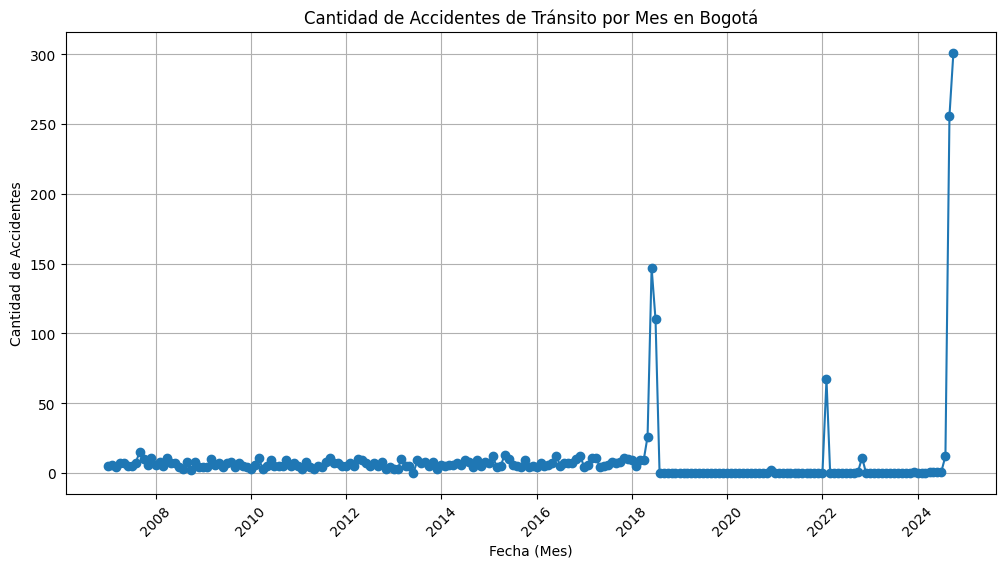

In [98]:
plt.figure(figsize=(12, 6))

# Graficar los accidentes por mes
plt.plot(accidentes_por_mes['FECHA_OCURRENCIA_ACC'], accidentes_por_mes['cantidad_accidentes'], marker='o', linestyle='-')

# Etiquetas y título
plt.xlabel('Fecha (Mes)')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes de Tránsito por Mes en Bogotá')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

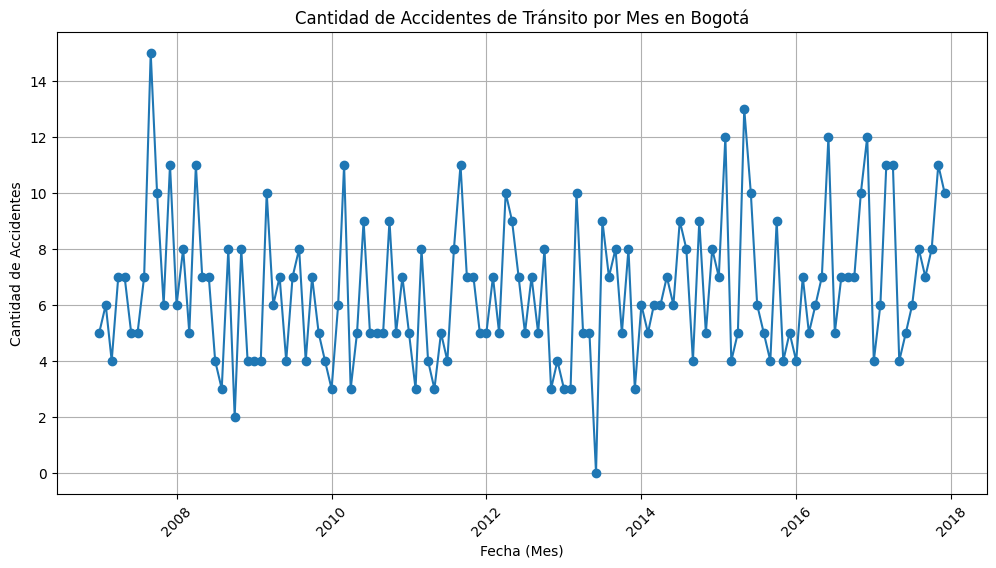

In [99]:
# Filtrar solo los registros hasta el año 2018 (inclusive)
mes_filtrado = accidentes_por_mes[accidentes_por_mes['FECHA_OCURRENCIA_ACC'].dt.year < 2018]

plt.figure(figsize=(12, 6))

# Graficar los accidentes por mes
plt.plot(mes_filtrado['FECHA_OCURRENCIA_ACC'], mes_filtrado['cantidad_accidentes'], marker='o', linestyle='-')

# Etiquetas y título
plt.xlabel('Fecha (Mes)')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes de Tránsito por Mes en Bogotá')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()